<a href="https://colab.research.google.com/github/Edu-Moreira/Estudos-de-Python/blob/main/Forma%C3%A7%C3%A3o_de_Carteira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
!pip install investpy
import pandas as pd
import investpy as inv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [197]:
#Cria variavel string com a data mais atual
hoje = dt.date.today()
hoje = hoje.strftime('%d/%m/%Y')

#Setando data inicial e final para as analises
data_inicial = '01/01/2017'
data_final = hoje

In [198]:
valor_inicial = 10000

acoes = ['vale3','petr4','itub4','bbdc4','b3sa3','abev3']
pesos = [0.35,0.2,0.135,0.054,0.0675,0.036,0.09,0.0675]


painel = pd.DataFrame()
for i in acoes:
  painel [i]= inv.get_stock_historical_data(stock= i,country = 'brazil', from_date = '01/01/2018', to_date = '01/04/2022')['Close']


#Obtendo dados de tesouro nacional

search_results = inv.search_quotes(text = 'tesouro selic 2027',countries=['brazil'])
for search_results in search_results:
  print(search_results)

tesouro_LFT_2027 = search_results.retrieve_historical_data(from_date='01/01/2017', to_date= '01/04/2022')

#Obtendo dados de tesouro nacional

search_results = inv.search_quotes(text = 'tesouro ipca 2045',countries=['brazil'])
for search_results in search_results:
  print(search_results)

tesouro_NTNB_2035 = search_results.retrieve_historical_data(from_date='01/01/2017', to_date= '01/04/2022')

{"id_": 1172586, "name": "Tesouro Selic Vencimento em 01/03/2027", "symbol": "LFT030127=ANDS", "country": "brazil", "tag": "/rates-bonds/brstnclf1rg5", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 1089897, "name": "Tesouro IPCA + NTNB 6 15-May-2045", "symbol": "NTB051545=", "country": "brazil", "tag": "/rates-bonds/ntnb-6-15-may-2045", "pair_type": "bonds", "exchange": "OTC Bonds"}


In [199]:
tesouro_NTNB_2035['NTNB 2045'] = tesouro_NTNB_2035['Close']
tesouro_LFT_2027['LFT 2027'] = tesouro_LFT_2027['Close']

In [200]:
painel1 = pd.merge(tesouro_NTNB_2035['NTNB 2045'],painel,on = 'Date') 
painel2 = pd.merge(tesouro_LFT_2027['LFT 2027'],painel1,on = 'Date') 
painel2

,LFT 2027,NTNB 2045,vale3,petr4,itub4,bbdc4,b3sa3,abev3
Date,,,,,,,,
2020-10-06,10431.411,4203.314,49.83,19.93,18.60,17.68,17.40,13.00
2020-10-07,10435.008,4221.152,51.15,19.79,18.46,17.49,17.38,13.18
2020-10-08,10453.112,4244.850,52.10,20.44,19.57,18.39,17.75,13.33
2020-10-09,10525.672,4257.121,52.36,19.80,19.52,18.47,17.71,13.22
2020-10-13,10562.881,4288.307,52.82,20.13,19.33,18.58,17.74,13.40
...,...,...,...,...,...,...,...,...
2022-03-28,11395.146,4258.950,95.34,31.60,27.45,22.17,15.09,14.74
2022-03-29,11400.716,4116.308,94.52,32.30,27.77,22.57,15.54,15.25
2022-03-30,11406.002,4102.258,95.87,32.99,27.83,22.43,15.67,15.17


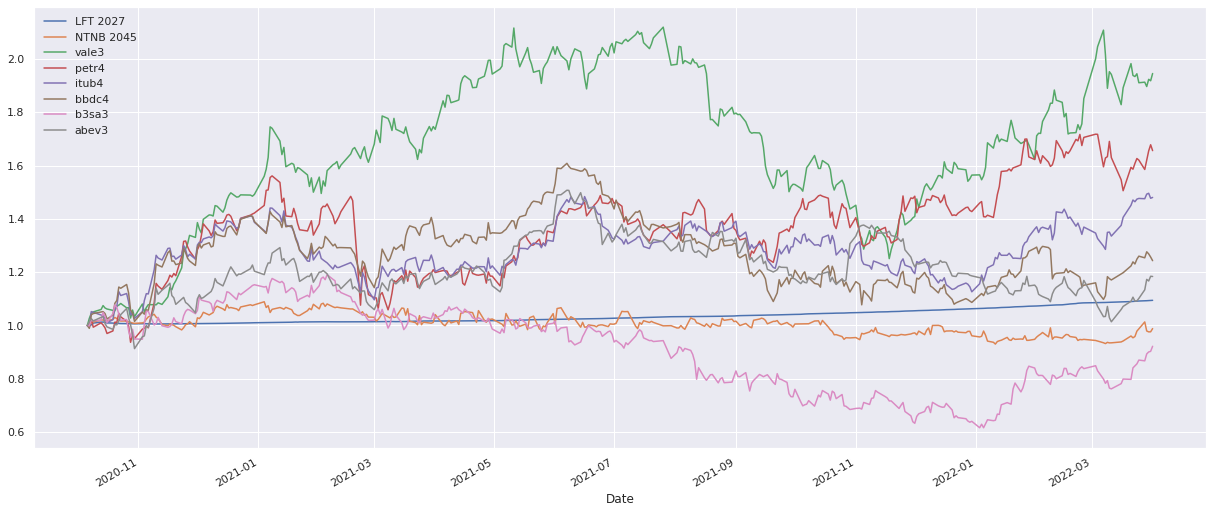

In [201]:
sns.set()
portfolio_normalizado = painel2/painel2.iloc[0]
portfolio_normalizado.plot(figsize = (21,9))

In [202]:
pesos = pd.DataFrame(pesos)
painel = pd.DataFrame(painel)
# q_in = pesos.T*valor_inicial
# q_in
carteira = np.multiply(painel2,pesos.T)
carteira = np.sum(carteira,axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  """


In [203]:
pesos = pd.DataFrame(pesos)

carteira = np.multiply(portfolio_normalizado,pesos.T)
carteira = np.sum(carteira,axis=1)
carteira

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


Date
2020-10-06    1.000000
2020-10-07    1.004103
2020-10-08    1.018726
2020-10-09    1.019918
2020-10-13    1.025415
                ...   
2022-03-28    1.228245
2022-03-29    1.228271
2022-03-30    1.233496
2022-03-31    1.233933
2022-04-01    1.240387
Length: 352, dtype: float64

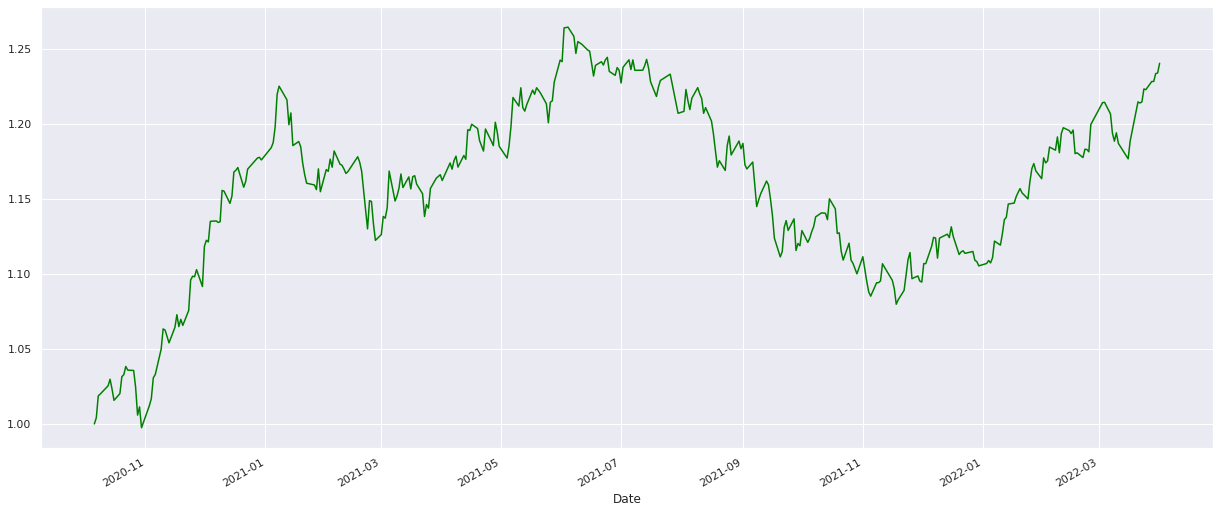

In [204]:
sns.set()
carteira_normalizada = carteira / carteira.iloc[0]

carteira_normalizada.plot(color = 'Green',figsize=(21,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54748ae3d0>,
      dtype=object)

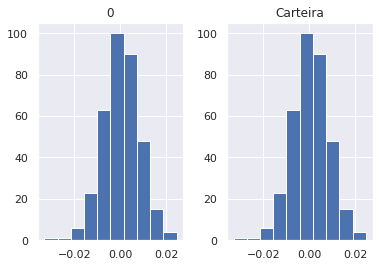

In [205]:
retorno_carteira['Carteira'] = carteira.pct_change()
retorno_carteira.hist()

## <font color = '#006BBA'> Otimizando a Carteira

In [206]:
#Retorno Anual de cada Ativo

retorno = painel2.pct_change()
retorno_anual = retorno.mean() * 252
retorno_anual

LFT 2027     0.064774
NTNB 2045    0.017479
vale3        0.545765
petr4        0.459958
itub4        0.331404
bbdc4        0.214161
b3sa3        0.013182
abev3        0.173537
dtype: float64

In [207]:
# Volatilidade média de cada ativo

retorno = painel2.pct_change()
retorno_anual = retorno.std() * np.sqrt(252)
retorno_anual

LFT 2027     0.007915
NTNB 2045    0.228185
vale3        0.367802
petr4        0.436662
itub4        0.315835
bbdc4        0.341071
b3sa3        0.378545
abev3        0.325519
dtype: float64

In [208]:
# Dados de interação entre os ativos 

cov = retorno.cov() * 252

corr = retorno.corr()

In [209]:
numero_ativos = len(retorno.columns)
numero_carteiras = 100000
ativos = list(retorno.columns)

# criando listas para receber os parametros
lista_retornos = []
lista_volatilidade =[]
lista_pesos= []
lista_sharpe_ratio = []

In [210]:
for carteira in range(numero_carteiras):
  
  peso = np.random.random(numero_ativos)
  peso /= np.sum(peso)
  lista_pesos.append(peso)
  
  retorno_esperado = np.dot(peso, retorno_anual)
  lista_retornos.append(retorno_esperado)
  
  volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
  lista_volatilidade.append(volatilidade)
  
  sharpe_ratio = retorno_esperado/volatilidade
  lista_sharpe_ratio.append(sharpe_ratio)

In [211]:
dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade': lista_volatilidade, 'Sharpe Ratio': lista_sharpe_ratio}
for contar,acao in enumerate(ativos):
  dic_carteiras[acao+' Peso'] = [Peso[contar] for Peso in lista_pesos]
portfolios = pd.DataFrame(dic_carteiras)
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in ativos]

portfolios = portfolios[colunas]
portfolios

,Retorno,Volatilidade,Sharpe Ratio,LFT 2027 Peso,NTNB 2045 Peso,vale3 Peso,petr4 Peso,itub4 Peso,bbdc4 Peso,b3sa3 Peso,abev3 Peso
0,0.301680,0.192875,1.564124,0.067020,0.240513,0.103378,0.123833,0.103247,0.234640,0.001386,0.125983
1,0.347983,0.247771,1.404453,0.020427,0.063265,0.029722,0.184540,0.218722,0.200926,0.232641,0.049757
2,0.308790,0.184891,1.670121,0.086152,0.154985,0.163821,0.129324,0.178165,0.020184,0.109943,0.157426
3,0.307224,0.211406,1.453240,0.152922,0.030120,0.162215,0.216894,0.104637,0.152534,0.016624,0.164055
4,0.322997,0.203276,1.588955,0.013749,0.199508,0.094696,0.088339,0.198751,0.167417,0.127530,0.110009
...,...,...,...,...,...,...,...,...,...,...,...
99995,0.295836,0.217838,1.358054,0.135671,0.046112,0.099782,0.095132,0.188100,0.288998,0.008099,0.138106
99996,0.285166,0.181986,1.566967,0.200787,0.044796,0.162247,0.098641,0.149176,0.085631,0.189855,0.068866
99997,0.309088,0.209389,1.476144,0.119079,0.108460,0.046120,0.240850,0.192538,0.031702,0.086710,0.174542
99998,0.269336,0.151256,1.780660,0.154284,0.240506,0.144360,0.033669,0.012300,0.042948,0.110000,0.261932


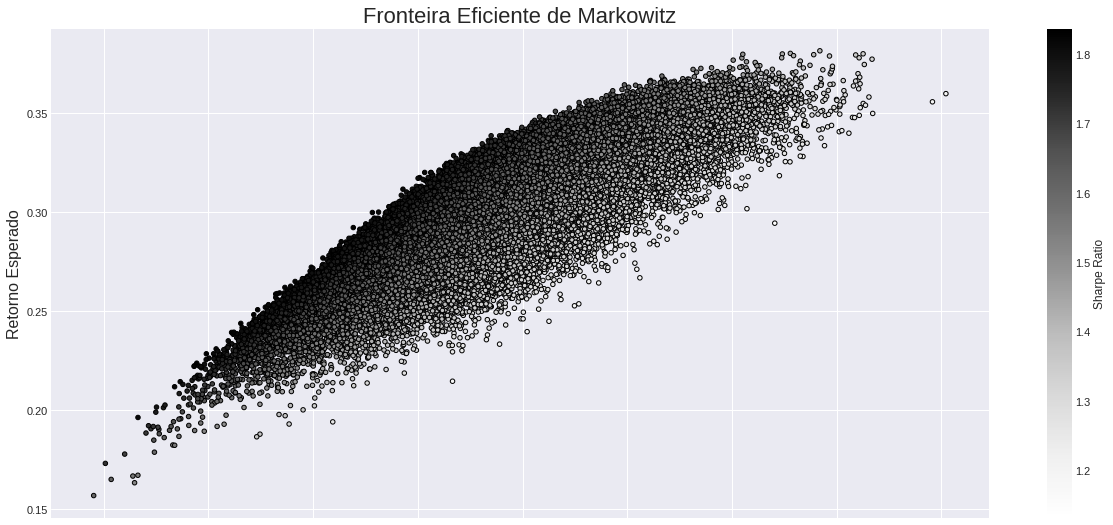

In [212]:
plt.style.use('seaborn-dark')
portfolios.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio', edgecolors='black', figsize=(21,9), grid=True)
plt.xlabel('Volatilidade', fontsize=16)
plt.ylabel('Retorno Esperado', fontsize=16)
plt.title('Fronteira Eficiente de Markowitz', fontsize=22)
plt.savefig('Fronteira.png', dpi = 500)

In [213]:
menor_volatilidade = portfolios['Volatilidade'].min()
carteira_min_variancia = portfolios.loc[portfolios['Volatilidade'] == menor_volatilidade]
carteira_min_variancia.T

,15684
Retorno,0.156910
Volatilidade,0.097588
Sharpe Ratio,1.607881
LFT 2027 Peso,0.554273
NTNB 2045 Peso,0.026550
vale3 Peso,0.177959
petr4 Peso,0.010795
itub4 Peso,0.027488
bbdc4 Peso,0.013864
b3sa3 Peso,0.025275


In [214]:
maior_sharpe = portfolios['Sharpe Ratio'].max()
carteira_maior_sharpe = portfolios.loc[portfolios['Sharpe Ratio'] == maior_sharpe]
carteira_maior_sharpe.T

,43489
Retorno,0.243851
Volatilidade,0.132718
Sharpe Ratio,1.837358
LFT 2027 Peso,0.245900
NTNB 2045 Peso,0.245420
vale3 Peso,0.147665
petr4 Peso,0.079595
itub4 Peso,0.009463
bbdc4 Peso,0.031808
b3sa3 Peso,0.091003


In [215]:
maior_retorno = portfolios['Retorno'].max()
carteira_maior_retorno = portfolios.loc[portfolios['Retorno']== maior_retorno]
carteira_maior_retorno.T

,53792
Retorno,0.381465
Volatilidade,0.271014
Sharpe Ratio,1.407548
LFT 2027 Peso,0.021391
NTNB 2045 Peso,0.063058
vale3 Peso,0.086823
petr4 Peso,0.393820
itub4 Peso,0.001294
bbdc4 Peso,0.011633
b3sa3 Peso,0.401073


In [216]:
portfolios.sort_values(by ='Volatilidade', ascending= True)

,Retorno,Volatilidade,Sharpe Ratio,LFT 2027 Peso,NTNB 2045 Peso,vale3 Peso,petr4 Peso,itub4 Peso,bbdc4 Peso,b3sa3 Peso,abev3 Peso
15684,0.156910,0.097588,1.607881,0.554273,0.026550,0.177959,0.010795,0.027488,0.013864,0.025275,0.163796
47181,0.173157,0.100375,1.725109,0.472075,0.123373,0.112097,0.026374,0.017448,0.095800,0.011079,0.141754
28995,0.165068,0.101765,1.622057,0.431597,0.307570,0.014686,0.023756,0.026304,0.127756,0.029595,0.038734
31166,0.177847,0.104989,1.693956,0.396489,0.296364,0.087896,0.017246,0.104913,0.058399,0.029693,0.009000
55803,0.166761,0.106940,1.559385,0.531765,0.044827,0.044244,0.084831,0.134128,0.006180,0.082973,0.071052
...,...,...,...,...,...,...,...,...,...,...,...
79943,0.358131,0.282731,1.266684,0.037475,0.017626,0.021847,0.378997,0.248759,0.154051,0.060280,0.080964
97060,0.377233,0.283476,1.330741,0.012052,0.048826,0.187850,0.429766,0.016103,0.258146,0.013712,0.033544
71125,0.349839,0.283634,1.233418,0.059752,0.083221,0.016845,0.398066,0.015126,0.411913,0.003458,0.011619
91244,0.355710,0.297900,1.194057,0.040213,0.021151,0.017000,0.419982,0.384566,0.068451,0.005351,0.043285


In [217]:
# Criando restrição de volatilidade em que a volatilidade fique entre 13% e 15%

restricao =portfolios.loc[(portfolios['Volatilidade'] < 0.15) & (portfolios['Volatilidade'] > 0.13) ] 
restricao.loc[restricao['Retorno']== restricao['Retorno'].max()].T


,39989
Retorno,0.272192
Volatilidade,0.149558
Sharpe Ratio,1.819974
LFT 2027 Peso,0.159870
NTNB 2045 Peso,0.253663
vale3 Peso,0.156684
petr4 Peso,0.087022
itub4 Peso,0.011670
bbdc4 Peso,0.033519
b3sa3 Peso,0.102464


##<font color = '#006BBA'> Determinando o benchmark

In [218]:
ibov = inv.get_etf_historical_data(etf = 'Ishares Ibovespa', country='brazil', from_date= '01/01/2015', to_date= hoje)['Close']
ibov = pd.DataFrame(ibov)
ibov = ibov.rename(columns={'Close':'IBOV'})
retorno_ibov = ibov.pct_change()

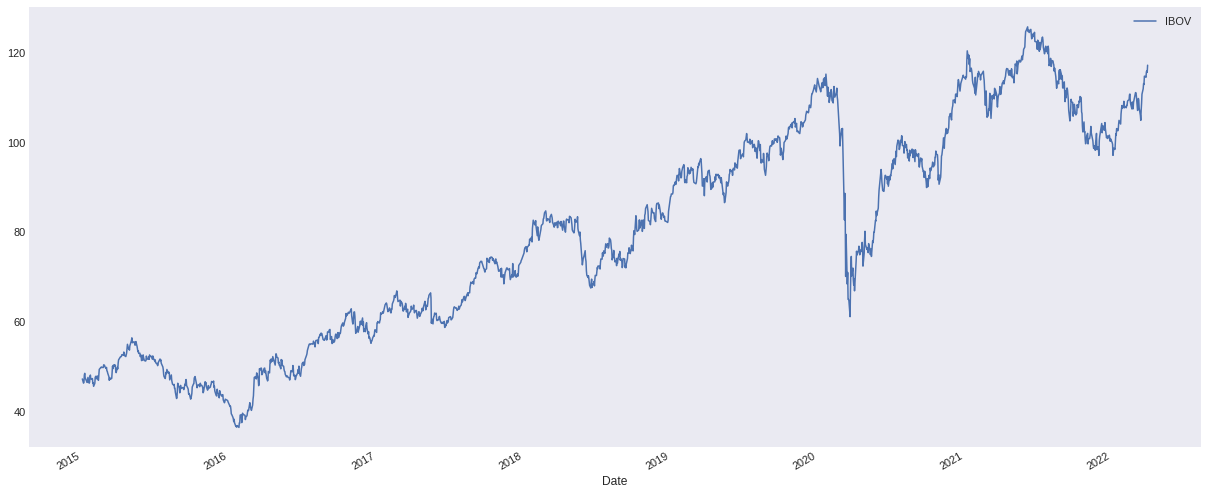

In [219]:
ibov.plot(figsize = (21,9))

In [220]:
#Verificando Beta da Carteira

beta = retorno_carteira['Carteira'].cov(retorno_ibov['IBOV'])/retorno_ibov['IBOV'].var()
beta


0.3040689627315402

In [227]:
pesos_ideal = portfolios.iloc[53792,3:]
pesos_ideal

LFT 2027 Peso     0.021391
NTNB 2045 Peso    0.063058
vale3 Peso        0.086823
petr4 Peso        0.393820
itub4 Peso        0.001294
bbdc4 Peso        0.011633
b3sa3 Peso        0.401073
abev3 Peso        0.020907
Name: 53792, dtype: float64

In [228]:
carteira_ideal = np.multiply(portfolio_normalizado,pesos_ideal.T)
carteira_ideal = np.sum(carteira_ideal, axis= 1)
carteira_ideal


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  """Entry point for launching an IPython kernel.


Date
2020-10-06    1.000000
2020-10-07    0.999502
2020-10-08    1.023833
2020-10-09    1.010923
2020-10-13    1.019830
                ...   
2022-03-28    1.265831
2022-03-29    1.287584
2022-03-30    1.306151
2022-03-31    1.315923
2022-04-01    1.317810
Length: 352, dtype: float64

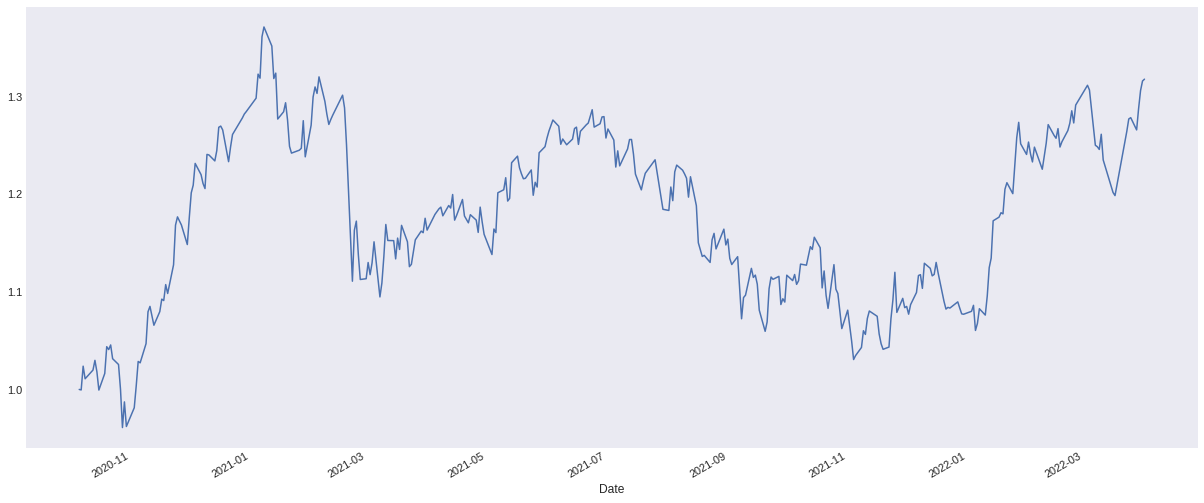

In [229]:
carteira_ideal_norm = carteira_ideal/carteira_ideal.iloc[0]

carteira_ideal_norm.plot(figsize=(21,9))

In [233]:
carteira_ideal_norm

Date
2020-10-06    1.000000
2020-10-07    0.999502
2020-10-08    1.023833
2020-10-09    1.010923
2020-10-13    1.019830
                ...   
2022-03-28    1.265831
2022-03-29    1.287584
2022-03-30    1.306151
2022-03-31    1.315923
2022-04-01    1.317810
Length: 352, dtype: float64

In [230]:
retorno_ideal['Carteira'] = carteira_ideal.pct_change()

In [231]:
beta2 = retorno_ideal['Carteira'].cov(retorno_ibov['IBOV'])/retorno_ibov['IBOV'].var()
beta2


0.6586299120098879

In [234]:
ibov/ibov.iloc[0]

,IBOV
Date,
2015-01-02,1.000000
2015-01-05,0.980110
2015-01-06,0.985612
2015-01-07,1.018832
2015-01-08,1.026449
...,...
2022-03-28,2.422979
2022-03-29,2.449217
2022-03-30,2.452391
